# Резервуарные вычисления
## Прогнозирование времянных рядов

Временные ряды позволяют прогнозировать значения на основании предыдущих значений временных рядов можно спрогнозировать тенденции в экономике и погоде или динамику распространения болезни. Ввиду особенных свойств данных временных рядов для работы с ними применяются специализированные статистические методы и подходы.

Кажется, что нейронные сети работают почти для всего что связано с нелинейными пространствами признаков. На самом деле рекуррентные нейронные сети могут использоваться и используются для прогнозирования фондового рынка, погоды. Однако у рекуррентных нейронных сетей (RNN) есть несколько проблем, что касается прогнозирования цен на акции, наиболее заметная проблема затухающих градиентов, связанная с RNN, а также очень зашумленные прогнозы. Ознакомится как использовать RNN для предсказаний акций можно [здесь](https://habr.com/ru/company/netologyru/blog/428227/)

Наиболее важной проблемой для RNN является проблема затухания градиента. Эта проблема возникает из-за того, что очень глубокие нейронные сети, оптимизированные с помощью процедуры, называемой обратным распространением, используют производные между каждым слоем для «обучения». Эти производные могут быть относительно небольшими или относительно большими. Если в моей сети есть 100 скрытых слоев, и я умножаю небольшое число само на себя 100 раз, значение практически исчезает. Это проблема, моя сеть не может ничего узнать, если все мои градиенты равны нулю, так что я могу сделать?

Существует несколько способов решить эту проблему:

1.   Метод отсечения градиентов (Clipping gradients method)
2.   Специальные RNN с блоками утечками, такими как Long-Short-Term-Memory (LSTM) и Gated Recurrent Units (GRU)
3.   Сеть эхового состояния (Echo states RNNs, ESN)



Отсечение градиента не позволяет нашим градиентам стать слишком большими или слишком маленькими, но мы все равно теряем информацию, делая это, поэтому это не идеальный подход.
RNN с блоками утечки хороши и являются стандартным методом, используемым большинством людей и компаний, использующих RNN в коммерческих целях. Эти алгоритмы адаптируют все соединения (входные, рекуррентные, выходные) с помощью некоторой версии градиентного спуска. Это делает эти алгоритмы медленными и, что может быть еще более громоздким, делает процесс обучения склонным к нарушению бифуркациями; сходимость не может быть гарантирована. Как следствие, RNN нечасто используются в практических инженерных приложениях.

Вот тут-то и появляются сети эхо-состояний. Сеть состояния эха — относительно новое изобретение, по сути, это рекуррентная нейронная сеть со слабо связанным скрытым слоем, называемым «резервуаром», который удивительно хорошо работает в присутствии хаотических временных рядов. В сети с эхо-состоянием нам нужно только обучить выходные веса сети, и это ускоряет обучение нейронной сети, обычно обеспечивает лучшие прогнозы. Обучение ESN, в отличие от других методов, быстрое, не страдает бифуркациями и легко реализуемо. В ряде эталонных задач ESN резко превзошли все другие методы нелинейного динамического моделирования.

Сеть эхо-состояний является частью категории вычислительной науки, известной как **резервуарные вычисления**, и мы углубимся в нее более подробно в следующем разделе.

# Echo State Networks

Подход, позволяющий избежать трудности с рекуррентностями, состоит в том, чтобы зафиксировать рекуррентные и входные веса и обучать только выходные веса: сеть состояний эха (ESN). Скрытые единицы образуют «резервуар» временных характеристик, которые охватывают различные аспекты входных данных истории.

Идея "эха" состоит в том, что некая динамическая среда, резервуар, состоящий из множества различных и связанных элементов, может давать отклик на входное воздействие. Отклики различных элементов разнообразны. Тогда появляется *надежда* найти среди всех откликов резервуара подходящий под нашу задачу или получить его с помощью **линейной** комбинации откликов эклементов.


ESN берет входной вектор последовательности произвольной длины u и отображает его в многомерное пространство состояний  резервуара х,  применяет линейный предиктор (линейная регрессия) для нахождения выхода y по этим состояниям (в число состояний включают также сами входы и доп. константы).

\begin{align}
\mathbf{x}(n+1) = f(\mathbf{W} \mathbf{x}(n) + \mathbf{W}^{in}
\mathbf{u}(n+1) + \mathbf{W}^{fb} \mathbf{y}(n))\ ,
\\
\\
\mathbf{y}(n) = g(\mathbf{W}^{out} \mathbf{z}(n))\ ,
\end{align}

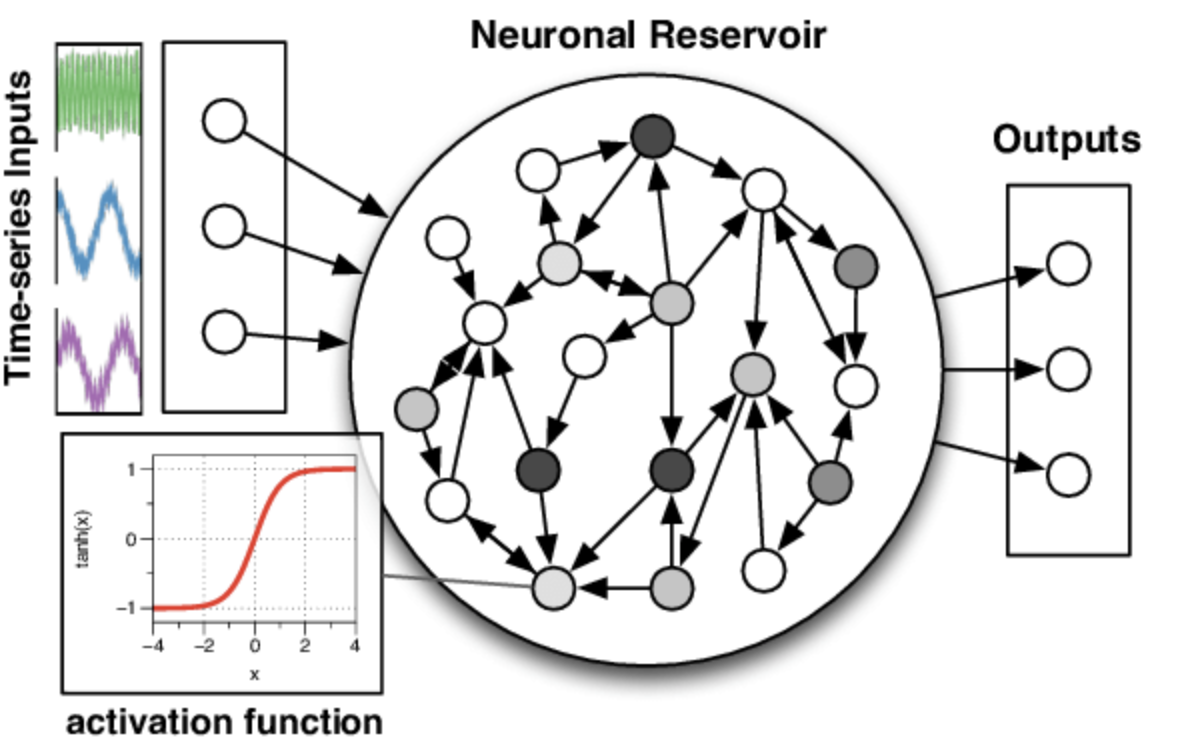

# Обучение

Входные и рекуррентные веса инициализируются случайным образом, а затем фиксируются. Так что мы их не обучаем.

Обучаются только выходные веса, что просто и быстро, но необходимо назначать гиперпараметры резервуара, которые управляют случайной генерацией весов, количеством узлов резервуара, разреженностью узлов резервуара, спектральным радиусом. К сожалению, не существует систематического метода оптимизации гиперпараметров, поэтому обычно это делается с использованием проверочного набора. Перекрестная проверка невозможна с данными временных рядов из-за присущей автокорреляции, присутствующей в пространстве признаков.

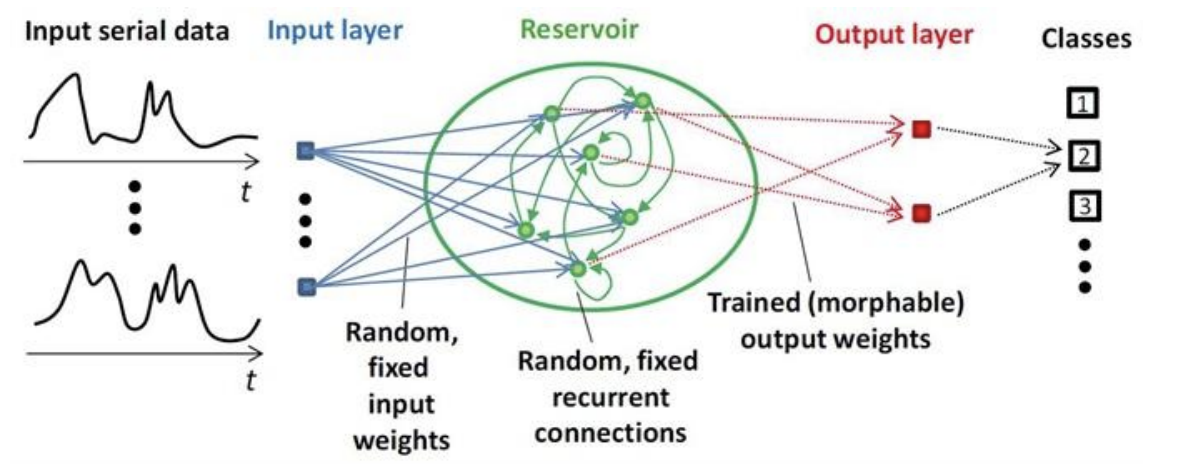

# Пример прогнозирования с ESN

Склонируем репозиторий с библиотекой PyESN

Скачаем данные для работы

In [ ]:
import gdown # модуль для загрузки с гугл-диска
url = 'https://drive.google.com/uc?id=19j9Ki6dh8arfD6v7AKahFTAAuFtiCJDX' # amzon.txt
output = 'amazon.txt' # название загружаемого файла
gdown.download(url, output, quiet=False) # загружаем

Downloading...
From: https://drive.google.com/uc?id=19j9Ki6dh8arfD6v7AKahFTAAuFtiCJDX
To: /content/amazon.txt
100%|██████████| 46.8k/46.8k [00:00<00:00, 53.9MB/s]


'amazon.txt'

In [ ]:
!git clone https://github.com/cknd/pyESN.git # клонируем репозиторий

Cloning into 'pyESN'...
remote: Enumerating objects: 106, done.
remote: Total 106 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (106/106), 1.17 MiB | 3.96 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [ ]:
ls

amazon.txt  pyESN/  sample_data/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN.pyESN import ESN
%matplotlib inline

# Read dataset amazon.txt (this was scraped from the internet)
amazon = open("amazon.txt").read().split()
data = np.array(amazon).astype('float64')

Создаем модель ESN командой ```ESN(*parameters)```

Параметры:
* **n_inputs**: количество входных параметров
* **n_outputs**: количество выходных измерений
* **n_reservoir**: количество нейронов в резервуаре
* **ranodom_state**: стартовое число для генератора случайных чисел
* **sparsity**: доля повторяющихся весов равна нулю
* **spectral_radius**: спектральный радиус рекуррентной весовой матрицы
* **noise**: к каждому нейрону добавляется шум (для регуляризации)

In [ ]:
esn = ESN(n_inputs = 1,
      n_outputs = 1,
      n_reservoir = 300,
      sparsity=0.1,
      random_state=41,
      spectral_radius = 1.2,
      noise=0.0003)

# Прогнозирование цен на акции Amazon

In [ ]:
data # посмотри на данные

array([133.9 , 134.69, 132.25, ..., 852.19, 845.24, 848.64])

Теперь воспользуемся  эхо сеть состояния для прогнозирования будущих цен на акции Amazon. Во-первых, мы импортируем все необходимые библиотеки, а также импортируем данные (которые в данном случае были взяты из Интернета).
Затем мы используем ESN из библиотеки pyESN для использования сети RC. Задача здесь состоит в том, чтобы предсказать на два дня вперед, используя предыдущие 1500 значений, и сделать это для 100 будущих значений (см. рисунок ниже). Итак, в конце у вас будет прогноз на 100 временных шагов с окном прогнозирования = 2. Мы будем использовать это как набор проверки.

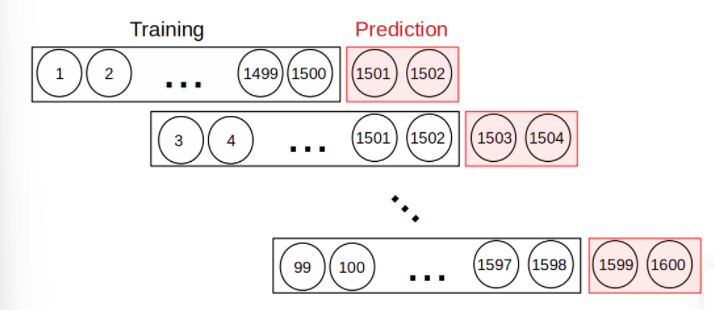

Во-первых, мы создаем нашу реализацию сети эхо-состояний, используя некоторые разумные значения, и указываем длину обучения и проверки. Затем мы создаем функции для вычисления среднеквадратичной ошибки, а также запускаем сеть эхо-состояний для конкретных входных параметров спектрального радиуса, шума и длины окна.

In [ ]:
n_reservoir= 200
sparsity=0.5
rand_seed=23
spectral_radius = 1.2
noise = .0005


esn = ESN(n_inputs = 1,
      n_outputs = 1,
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)


In [ ]:
"""
trainlen = 1500
future = 2
futureTotal=100
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]
"""

KeyboardInterrupt: 

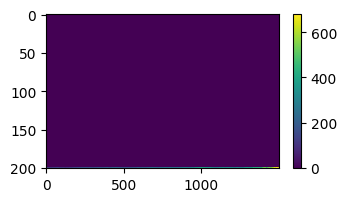

In [45]:
trainlen = 1500
future = 2
futureTotal=100
pred_tot=np.zeros(futureTotal)

pred_training = esn.fit(data[:trainlen],data[future:trainlen+future],inspect=True)
prediction = esn.predict(data[trainlen:trainlen+futureTotal])
pred_tot = prediction[:,0]

In [46]:
import seaborn as sns
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

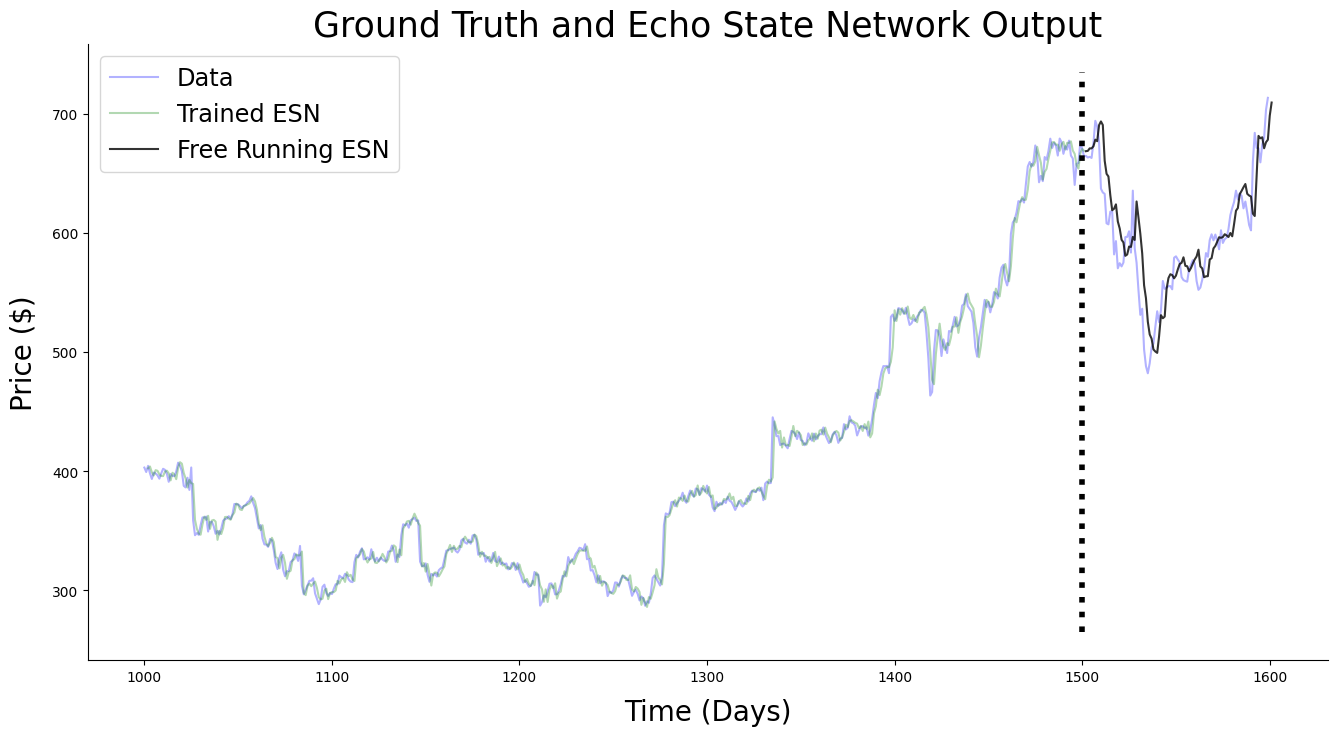

In [47]:
plt.figure(figsize=(16,8))
start=1000
plt.plot(range(start,trainlen+futureTotal),data[start:trainlen+futureTotal],'b',label="Data", alpha=0.3)
plt.plot(range(start+future,trainlen+future),pred_training[start:trainlen],'g',label="Trained ESN", alpha=0.3)
plt.plot(range(trainlen+future,trainlen+futureTotal+future),pred_tot,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

Выглядит красиво, но стоит отметить что мы делаем предсказание не сразу на все 100 следующих элемента, а на следующие 2 элемента, то есть на основе данных data[0:1500] мы предсказываем y_predicted[0:2], для data[2:1502] мы предсказываем y_predicted[2:4], а для data[98:1598] мы получаем y_predicted[98:100].

In [60]:
futureTotal = 300
test = data[:1500]
pred_tot2=np.zeros(futureTotal)

In [63]:

future = 2
for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),test[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot2[i:i+future] = prediction[:,0]
    test = np.hstack([ test, prediction[:,0]])


In [61]:
"""
future = 2
z1=test[0:1]
z2=test[1:2]
for i in range(0,futureTotal, future):
    z1 = esn.predict(z1)
    z2 = esn.predict(z2)
    pred_tot2[i] = z1
    pred_tot2[i+1] = z2

"""

Теперь мы можем поострить график. Как видим предсказанные значения лежат близко с настоящими значениями

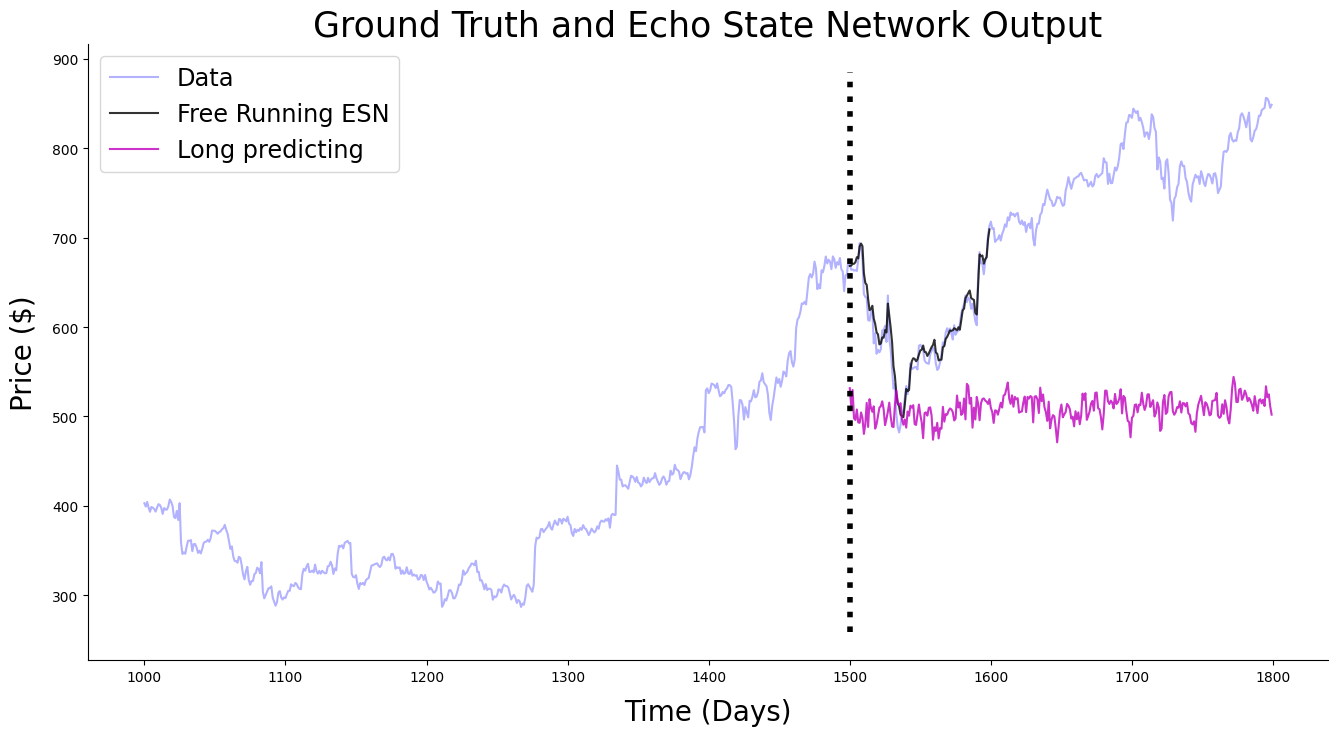

In [64]:
plt.figure(figsize=(16,8))
plt.plot(range(1000,trainlen+futureTotal),data[1000:trainlen+futureTotal],'b',label="Data", alpha=0.3)
# plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+100),pred_tot,'k',  alpha=0.8, label='Free Running ESN')
plt.plot(range(trainlen,trainlen+futureTotal), pred_tot2,'k',color="m",  alpha=0.8, label='Long predicting')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

Как можно увидеть из графика выше, если мы попытаемся сразу предсказать следующие 300 значений, что намного выше изначальных 2, то разброс между предзаказанным и реальным будет большим.

Функция вычисляющая MSE между значениями:



In [ ]:
def MSE(yhat, y):
    return np.sqrt(np.mean((yhat.flatten() - y)**2))

MSE ровно 93 для предсказаний на следующие 300 дней, что довольно много

In [ ]:
MSE(pred_tot2, data[1500:1800])

93.19054332307262

Переберем гиперпараметры для сетки с предсказанием на следующие 5 элементов

In [ ]:
n_reservoir= 500
sparsity   = 0.2
rand_seed  = 23

radius_set = [0.5, 1.1, 1.5]
noise_set = [ 0.0001, 0.0007, 0.005]



radius_set_size  = len(radius_set)
noise_set_size = len(noise_set)

trainlen = 1500
future = 5
futureTotal= 100

loss = np.zeros([radius_set_size, noise_set_size])

for l in range(radius_set_size):
    rho = radius_set[l]
    for j in range(noise_set_size):
        noise = noise_set[j]

        pred_tot=np.zeros(futureTotal)

        esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = rho,
          noise=noise)
        test = data[:trainlen]
        pred_tot2=np.zeros(futureTotal)
        for i in range(0,futureTotal,future):
            pred_training = esn.fit(np.ones(trainlen),test[i:trainlen+i])
            prediction = esn.predict(np.ones(future))
            pred_tot2[i:i+future] = prediction[:,0]
            test = np.hstack([ test, prediction[:,0]])

        loss[l, j] = MSE(test[trainlen:trainlen+futureTotal], data[trainlen:trainlen+futureTotal])
        print('rho = ', radius_set[l], ', noise = ', noise_set[j], ', MSE = ', loss[l][j] )

rho =  0.5 , noise =  0.0001 , MSE =  4503.129563065846
rho =  0.5 , noise =  0.0007 , MSE =  5924.276045735066
rho =  0.5 , noise =  0.005 , MSE =  6416.611723717079
rho =  1.1 , noise =  0.0001 , MSE =  56.889877012129546
rho =  1.1 , noise =  0.0007 , MSE =  66.35021297595637
rho =  1.1 , noise =  0.005 , MSE =  98.50431519741154
rho =  1.5 , noise =  0.0001 , MSE =  59.2241724399597
rho =  1.5 , noise =  0.0007 , MSE =  60.925207888622126
rho =  1.5 , noise =  0.005 , MSE =  143.02725798097006


Посмотрим на график MSE в зависимости от различных гиперпараметров

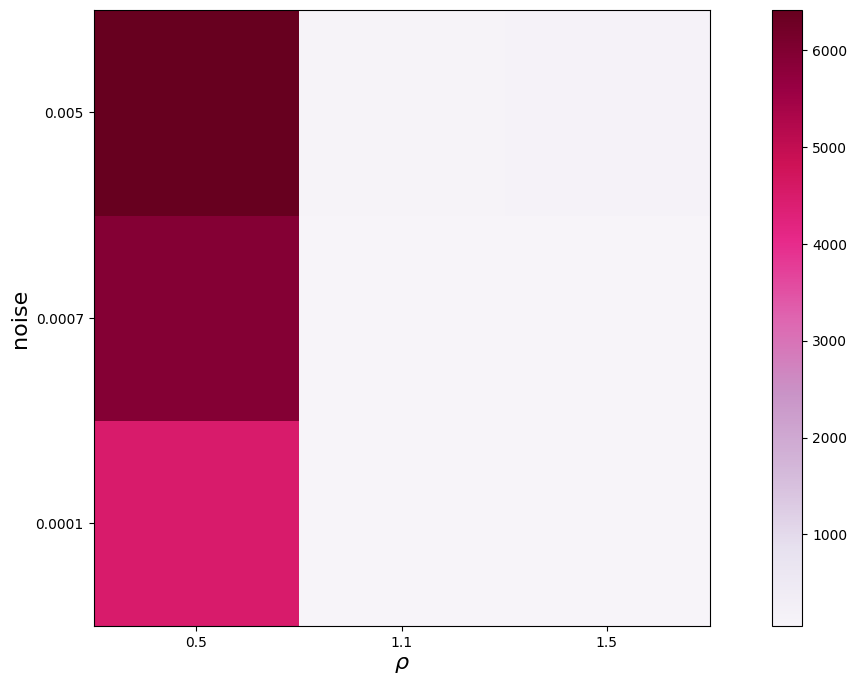

In [ ]:
plt.figure(figsize=(16,8))
im = plt.imshow(loss.T, vmin=abs(loss).min(), vmax=abs(loss).max(), origin='lower',cmap='PuRd')
plt.xticks(np.linspace(0,radius_set_size-1,radius_set_size), radius_set);
plt.yticks(np.linspace(0,noise_set_size-1, noise_set_size), noise_set);
plt.xlabel(r'$\rho$', fontsize=16); plt.ylabel('noise', fontsize=16);

# im.set_interpolation('bilinear')
cb = plt.colorbar(im);

Как видим оптимальные параметры составляют:

In [ ]:
minLoss = np.min(loss)
index_min = np.where(loss == minLoss)
index_min
rho_opt = radius_set[int(index_min[0])]
noise_opt = noise_set[int(index_min[1])]
print('Оптимальные гиперпараметры:\nspectrum radius = ',
      rho_opt,'\nnoise = ',noise_opt,'\nMSE = ',minLoss)

Оптимальные гиперпараметры:
spectrum radius =  1.1 
noise =  0.0001 
MSE =  56.889877012129546


Тем не менее, это дает нам довольно хороший результат на нашем наборе проверки, когда оконная функция мала. Это делает ESN хорошим для краткосрочных прогнозов цен на акции, но все становится немного более неопределенным и рискованным, если вы пытаетесь экстраполировать результаты.
В будущих прогнозах ошибка распространяется во времени и, таким образом, увеличивается во времени. Это связано с тем, что с увеличением длины окна точность снижается. Мы можем видеть это поведение на графике ниже, где MSE является монотонно возрастающей функцией окна предсказания, следовательно, более длинные предсказания означают большее значение MSE.

In [ ]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.1
noise = .0001

# различнная длина предсказаний
k_set = [1,2,5,10]

k_size = len(k_set)
loss_k = np.zeros(k_size)

for l in range(k_size):
    future = k_set[l]

    trainlen = 1500
    futureTotal=100

    pred_tot=np.zeros(futureTotal)

    esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = n_reservoir,
          sparsity=sparsity,
          random_state=rand_seed,
          spectral_radius = spectral_radius,
          noise=noise)


    for i in range(0,futureTotal,future):
        pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
        prediction = esn.predict(np.ones(future))
        pred_tot[i:i+future] = prediction[:,0]

    loss_k[l] = MSE(pred_tot, data[trainlen:trainlen+futureTotal])

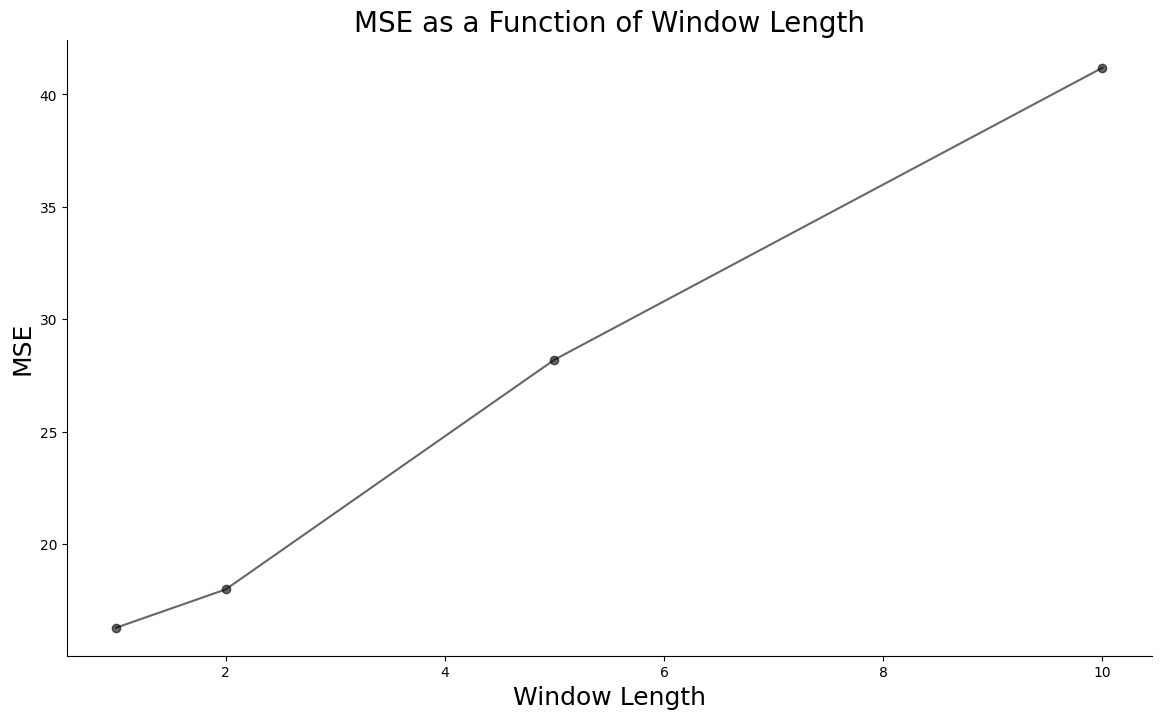

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(k_set, loss_k,'-ok', alpha=0.6)
plt.title('MSE as a Function of Window Length', fontsize=20)
plt.xlabel('Window Length', fontsize=18)
plt.ylabel('MSE', fontsize=18)
sns.despine()

График выше показывает среднее MSE при предсказание на следующие n дней(Window Length), к примеру если по данным предсказать цену на следующие 2 дня, то ошибка в среднем составит 20

# Выводы

Способность сети эхо-состояний анализировать хаотические временные ряды делает ее интересным инструментом для финансового прогнозирования, когда данные сильно не линейны и хаотичны. Но с этими сетями мы можем сделать больше, чем предсказать фондовый рынок. Данная сеть сильно зависит от значений гиперпараметров, которые определяют точность модели. Мы также можем:
*   Прогноз погоды
*   Управление сложными динамическими системами
*   Выполнить распознавание образов

Если вас интересуют эти сети, есть еще статьи и исследовательские работы, посвященные этому, которые находятся в свободном доступе.

[Echo_state_network](http://www.scholarpedia.org/article/Echo_state_network)

[Deep Echo State Network](https://arxiv.org/abs/1712.04323)

Задания

1.  Увеличьте окно предсказания с 2 до [5, 10, 20] и посмотрите как ведет себя предсказанное и настоящее значение. Постройте графики.

In [ ]:
#Решение

2. Попробуйте, воспользовавшись данными, который представляет собой значения некоторой функции и предсказать следующие значения.

In [ ]:
x = np.linspace(start=0, stop=40, num=2000, endpoint=True)

In [ ]:
data = np.sin(np.cos(x))

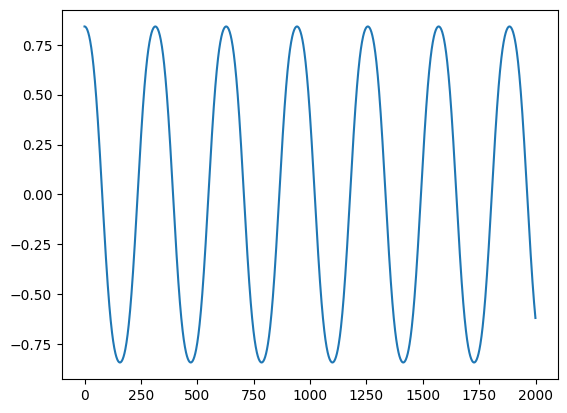

In [ ]:
plt.plot(data)

In [ ]:
#место для решения

# Решение

In [ ]:
n_reservoir= 300
sparsity=0.4
rand_seed=23
spectral_radius = 0.95
noise = .001


esn = ESN(n_inputs = 1,
      n_outputs = 1,
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise,
    )

trainlen = 1000
future = 10
futureTotal=500
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future), )
    pred_tot[i:i+future] = prediction[:,0]

In [ ]:
futureTotal = futureTotal
test = data[:trainlen]
pred_tot2=np.zeros(2000)

In [ ]:
future = 2
for i in range(0,2000,future):
    pred_training = esn.fit(np.ones(trainlen),test[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot2[i:i+future] = prediction[:,0]
    test = np.hstack([ test, prediction[:,0]])

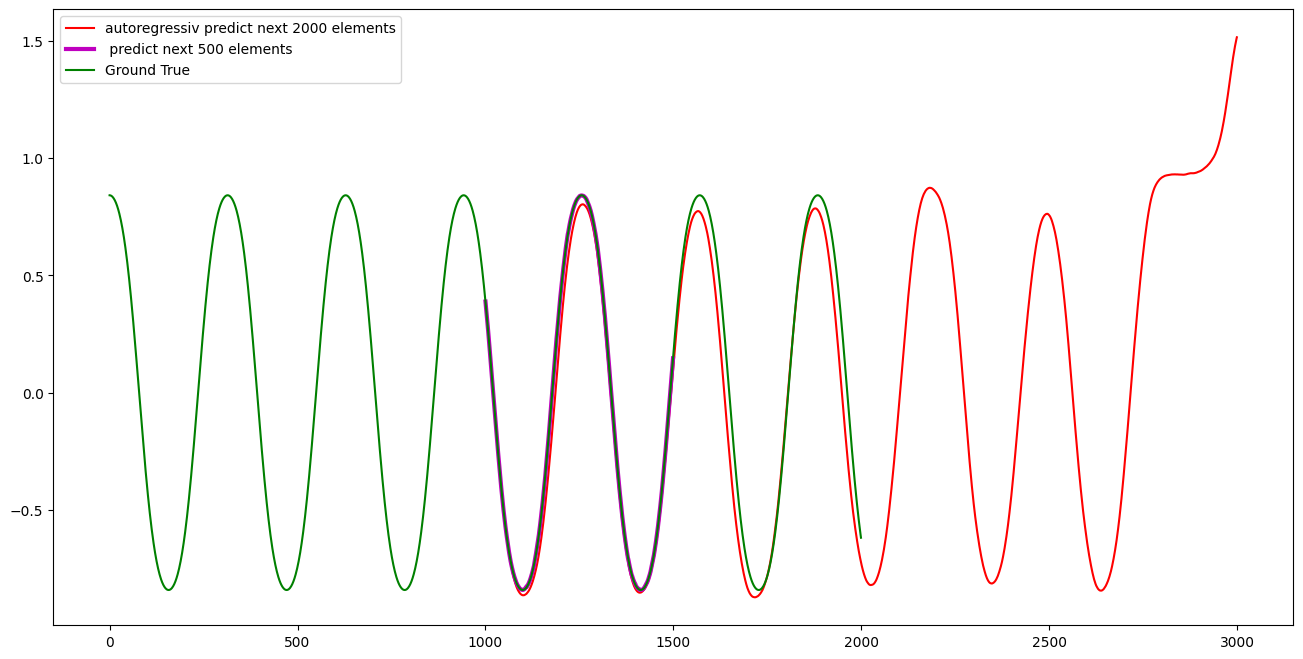

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(range(trainlen,trainlen+2000),pred_tot2,color="r",label="autoregressiv predict next 2000 elements")
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,color="m",label=" predict next 500 elements",linewidth=3)

plt.plot(data,color="g",label="Ground True",)
plt.legend()

# Ссылки
Использовались и адаптировались материалы:
*  https://towardsdatascience.com/predicting-stock-prices-with-echo-state-networks-f910809d23d4
*   https://www.tensorflow.org/addons/api_docs/python/tfa/layers/ESN
*   https://www.tensorflow.org/addons/api_docs/python/tfa/layers/ESN
*   http://www.scholarpedia.org/article/Echo_state_network
*   https://github.com/cknd/pyESN
*   https://www.nature.com/articles/s41467-021-27715-5
*  https://wikisko.ru/wiki/Echo_state_network